## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

## Load the data and make a dataframe

In [2]:
data = pd.read_csv('loans.csv')

> Inspect the original dataframe

In [ ]:
data.head(10)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
print('missing values: ', data.isnull().sum())

## Prepare data

In [3]:
df = data[['loan_amount', 'lender_count', 'status', 'repayment_term', 'sector', 'location_country_code']]

> Inspecting data

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.shape

> Missing data and handling it

In [4]:
print('missing values: ', df.isnull().sum())

missing values:  loan_amount               0
lender_count              0
status                    0
repayment_term            0
sector                    0
location_country_code    17
dtype: int64


In [5]:
df = df.fillna(method='ffill')

In [ ]:
print('missing values: ', df.isnull().sum())

> Data visualization

In [ ]:
df['status'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
df['sector'].value_counts().plot(kind='bar', figsize=(6,6))

In [ ]:
ax = sns.regplot(x='lender_count', y='loan_amount', data=df)

In [ ]:
ax = sns.regplot(x='repayment_term', y='loan_amount',data=df)

In [ ]:
# sns.heatmap(df.corr())

## One-Hot Encoding

## method 1

In [6]:
df = pd.get_dummies(df, columns=['sector', 'status', 'location_country_code'],  drop_first=True, dtype=int)

In [ ]:
df.info()

## Making the datasets (train, valid, test)

In [ ]:
# train, valid, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [ ]:
# train.head()

In [ ]:
# valid.head()

In [ ]:
# test.head()

In [ ]:
# print('train data shape :      ', train.shape)
# print('validating data shape : ', valid.shape)
# print('test data shape :       ', test.shape)

## Spliting data 

In [26]:
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the features

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

### logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
score = log_model.score(X_test_scaled, y_test)
score

0.22591362126245848

In [24]:
y_pred = log_model.predict(X_test_scaled)

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

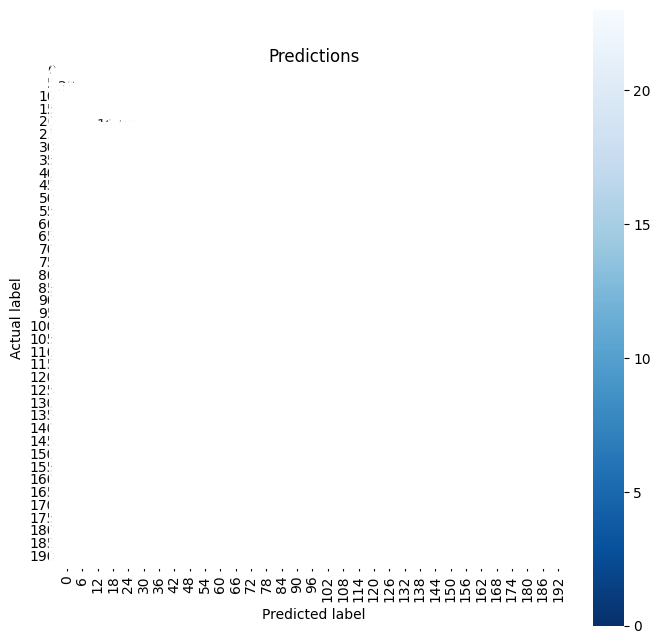

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Predictions')

plt.show()


### KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

### Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

### Support vector model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier()  
rf_model.fit(X_train, y_train) 

In [ ]:
y_pred = rf_model.predict(X_test_scaled)  

In [ ]:
accuracy = accuracy_score(y_test, y_pred) 
classification_report_output = classification_report(y_test, y_pred)  
conf_matrix = confusion_matrix(y_test, y_pred)  

In [ ]:
print("Accuracy:", accuracy) 
# print("Classification Report:")
# print(classification_report_output) 
print("Confusion Matrix:")
print(conf_matrix)

## Making the Pickle file

In [ ]:
# Save the trained model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

print("The best model (logistic regression) has been saved to 'model.pkl'.")